<a href="https://colab.research.google.com/github/Rdcornejov/Metodologia-para-Data-Science/blob/main/entregable1_crisp_dm_resolucion_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodologías de Data Science
## Ejercicio 1 - CRISP DM
## Análisis de Sentimientos en Reviews de Productos
### Cubre los primeros pasos del ciclo de vida de un proyecto de Data Science hasta la fase de preparación de los datos.


Desde este notebook el grupo crea su bitácora del caso de proyecto.
Incluir:
- Descripción del problema
- Objetivos del proyecto y el ciclo de vida utilizando CRISP-DM.
- Análisis exploratorio utilizando datos sencillos y librerías como pandas y matplotlib.
- Propuesta de modelo, definir métodos o framework, no entrenar.

In [ ]:
# Instalar librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

In [ ]:
# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#1. Comprensión del Negocio
Comprender el objetivo del negocio y definir el problema.


- **Comprender el Problema:** Identificar las necesidades del cliente y establecer metas claras para el análisis de sentimientos.
- **Recolectar y Comprender los Datos:** Analizar las reviews de productos, entender su distribución y características.
- **Preparación de los Datos:** Limpiar y preprocesar los datos para su uso en el modelo de análisis de sentimientos.
- **Desarrollo de un Modelo Preliminar:** Proponer un modelo basado en técnicas básicas para clasificar los sentimientos en las reviews.


   - _Propósito_: El propósito de este análisis es comprender las opiniones de los usuarios a través de sus reviews para identificar patrones de satisfacción o insatisfacción.
   - _Métricas de Éxito_: Exactitud del modelo, interpretación clara de los patrones.


# 2. Comprensión de los Datos
Analizar los datos disponibles.
Opcional añadir más valores al dataset.

   - _Descripción del Dataset_: Contamos con un conjunto de datos que incluye el texto de las reviews y una etiqueta de sentimiento (positivo o negativo).
   

In [ ]:
data = {
    'ReviewText': [
        'Great product, I loved it!', 'Terrible quality, very disappointed',
        'Exactly what I needed', 'Not worth the money',
        'Amazing, highly recommend!', 'Broke after one use'
    ] * 100,
    'Sentiment': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative'] * 100
}

In [ ]:
df = pd.DataFrame(data)


Distribución de Sentimientos:
 Sentiment
Positive    300
Negative    300
Name: count, dtype: int64


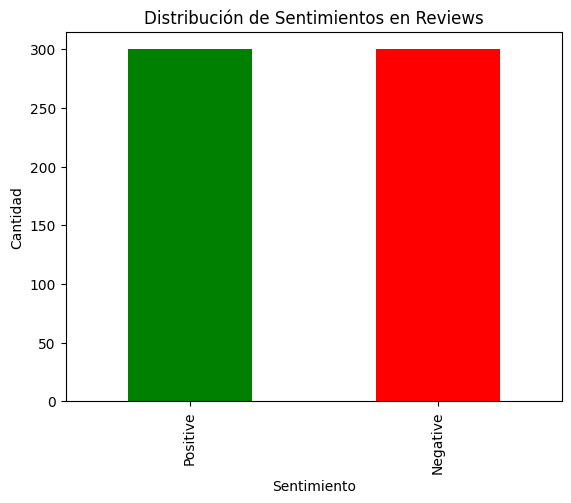

In [ ]:
 # Análisis de la distribución de sentimientos
contador_sentimientos = df['Sentiment'].value_counts()
print("Distribución de Sentimientos:\n", contador_sentimientos)
contador_sentimientos.plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de Sentimientos en Reviews')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

Interpretación: Observamos que los datos están equilibrados, con un número igual de reviews positivas y negativas. Esto es ideal para un análisis de sentimientos porque no habrá sesgo hacia una clase particular.

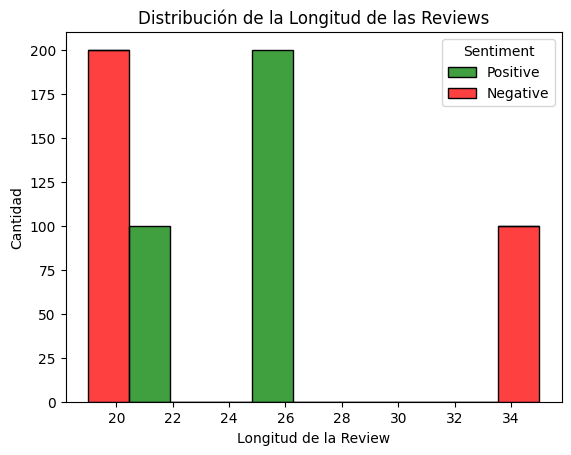

In [ ]:
df['ReviewLength'] = df['ReviewText'].apply(len)
sns.histplot(data=df, x='ReviewLength', hue='Sentiment', multiple='stack', palette=['green', 'red'])
plt.title('Distribución de la Longitud de las Reviews')
plt.xlabel('Longitud de la Review')
plt.ylabel('Cantidad')
plt.show()

La longitud de las reviews puede influir en cómo se expresan los sentimientos. Este gráfico nos permite ver si hay diferencias en la longitud entre las reviews positivas y negativas.

# 3. Preparación de los Datos
 Limpiar y preprocesar las imágenes para que sean utilizadas en el modelo.

In [ ]:
# 1. Limpieza de datos
#Convertimos el texto a minúsculas y eliminamos la puntuación para asegurar que las palabras sean tratadas de manera uniforme.

# Convertir a minúsculas
df['CleanedText'] = df['ReviewText'].str.lower()

# Eliminar puntuación
df['CleanedText'] = df['CleanedText'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))



In [ ]:
# 2. Tokenización y eliminación de stop words
#Las reviews se dividen en palabras individuales y se eliminan las palabras comunes que no aportan valor (stop words).

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['TokenizedText'] = df['CleanedText'].apply(preprocess_text)


In [ ]:
df.head(10)

,ReviewText,Sentiment,CleanedText,TokenizedText
0,"Great product, I loved it!",Positive,great product i loved it,great product loved
1,"Terrible quality, very disappointed",Negative,terrible quality very disappointed,terrible quality disappointed
2,Exactly what I needed,Positive,exactly what i needed,exactly needed
3,Not worth the money,Negative,not worth the money,worth money
4,"Amazing, highly recommend!",Positive,amazing highly recommend,amazing highly recommend
5,Broke after one use,Negative,broke after one use,broke one use
6,"Great product, I loved it!",Positive,great product i loved it,great product loved
7,"Terrible quality, very disappointed",Negative,terrible quality very disappointed,terrible quality disappointed
8,Exactly what I needed,Positive,exactly what i needed,exactly needed
9,Not worth the money,Negative,not worth the money,worth money


In [ ]:
# 3. Stemming
#Se aplica stemming para reducir las palabras a su raíz, lo que ayuda a reducir la dimensionalidad del texto.
ps = PorterStemmer()

def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [ps.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

df['StemmedText'] = df['TokenizedText'].apply(stem_text)


In [ ]:
# 4. Vectorización
#Se convierten los textos preprocesados en vectores numéricos mediante Bag of Words y TF-IDF,
#preparando los datos para su uso en modelos de Machine Learning.

# Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['StemmedText'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['StemmedText'])

# Etiquetas (Sentiment)
y = df['Sentiment']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Mostrar primeros ejemplos de los datos procesados
print("Texto Original:", df['ReviewText'].iloc[0])
print("Texto Preprocesado:", df['StemmedText'].iloc[0])

Texto Original: Great product, I loved it!
Texto Preprocesado: great product love


# 4. Propuesta de Modelado
- añadir pasos o recursos a utilizar

Dado que el conjunto de datos es relativamente simple y balanceado, se propone utilizar un modelo básico de Naive Bayes. Este modelo es eficiente para problemas de clasificación de texto y es una buena opción inicial para este tipo de análisis.

Pasos para el modelado:

Vectorizar el texto utilizando técnicas como TF-IDF.
Entrenar el modelo con el dataset disponible.
Evaluar el rendimiento con validación cruzada.